# 来自Bitly的USA.gov数据

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.dpi':250})

In [3]:
path = 'datasets/bitly_usagov/example.txt'

In [6]:
# 这是一个以json格式存储的dataset
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

利用python第三方模块json解析datasets


In [15]:
import json
records = []
with open(path, 'r') as f:
    for line in f.readlines():
        records.append(json.loads(line))

In [18]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## 用纯python代码对时区进行计数

获取时区,，由于里面存在一些数据没有时区，默认设置为None值

In [27]:
time_zones = [rec.get('tz', None) for rec in records]
time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 None,
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 None,
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong

### 使用纯python计算统计时区个数

In [40]:
def get_tz_counts(tzs):
    """
    统计时区出现的次数
    """
    # 创建一个空字典接受unique时区
    tz_dict = dict()
    # 遍历列表，如果tz已经在字典中出现过，则次数增加1，如果没有，则设置初始值1
    for tz in tzs:
        if tz in tz_dict:
            tz_dict[tz] += 1
        else:
            tz_dict[tz] = 1
    return tz_dict
tz_dict = get_tz_counts(time_zones)

### 使用python标准库统计

In [51]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)  # 初始值为0
    for x in sequence:
        counts[x] += 1
    return counts

get_counts2(time_zones)['']

521

获取前10位的时区及计数

In [57]:
def top_counts(count_dict, top=10):
    value_key_pairs = [(count, tz) for (tz, count) in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-10:]
top_counts(get_counts2(time_zones))

[(35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (120, None),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [58]:
from collections import Counter
Counter(time_zones).most_common()[:10]

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 (None, 120),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35)]

## 使用Pandas对时区进行计数

In [65]:
df = pd.read_json(path, lines=True).drop('_heartbeat_', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 17 columns):
a     3440 non-null object
al    3094 non-null object
c     2919 non-null object
cy    2919 non-null object
g     3440 non-null object
gr    2919 non-null object
h     3440 non-null object
hc    3440 non-null float64
hh    3440 non-null object
kw    93 non-null object
l     3440 non-null object
ll    2919 non-null object
nk    3440 non-null float64
r     3440 non-null object
t     3440 non-null float64
tz    3440 non-null object
u     3440 non-null object
dtypes: float64(3), object(14)
memory usage: 472.9+ KB


这里frame的输出形式是摘要视图（summary view），主要用于较大的DataFrame对象。我们然后可以对Series使用value_counts方法：

In [80]:
tz_counts = df['tz'].value_counts()
tz_counts.head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

使用matplotlib可视化

先填充缺失值，修改未知时区为‘Unknow

In [93]:
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknow'
tz_counts = clean_tz.value_counts()
tz_counts

America/New_York                  1251
Unknow                             521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
Asia/Hong_Kong                      10
Europe/Moscow                       10
Europe/Oslo              

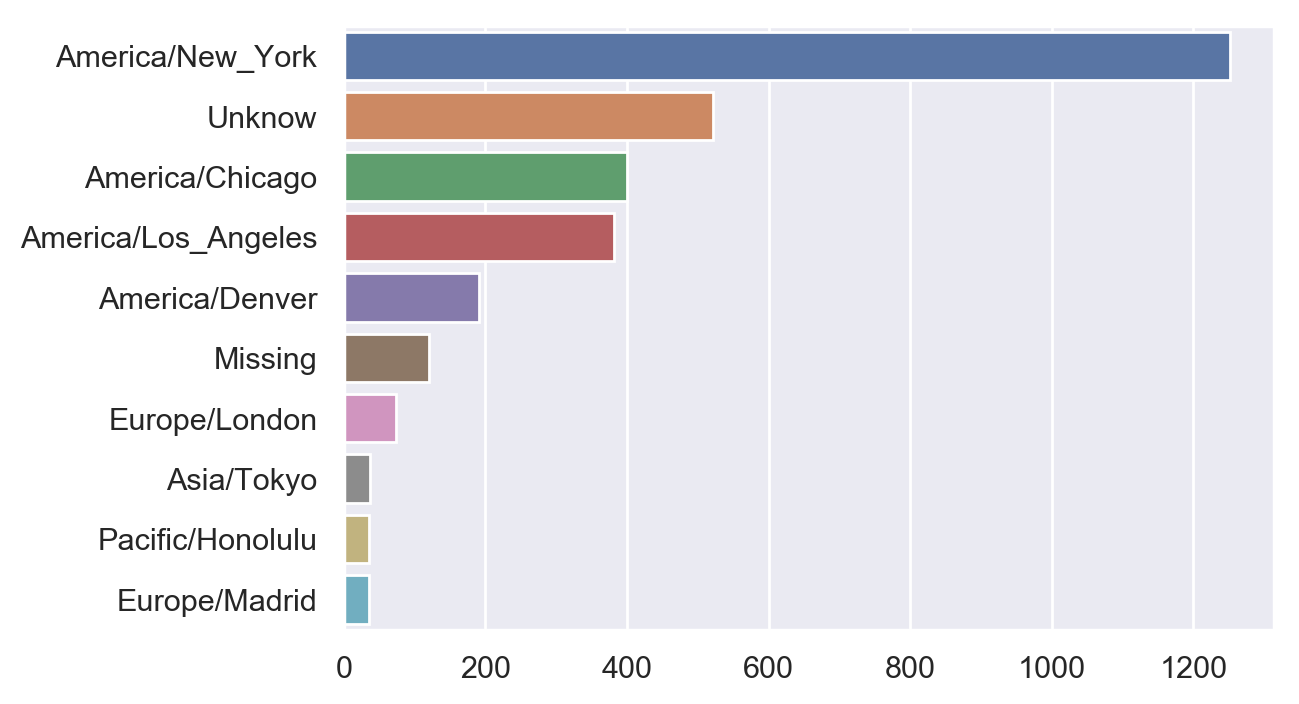

In [101]:
sns.barplot(y=tz_counts[:10].index, x=tz_counts[:10].values)

In [103]:
df.head()

,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


对ugent-agent进行分类

In [111]:
results = pd.Series([x.split()[0] for x in df.a.dropna()])
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [114]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

按windows用户与非windows用户划分

In [129]:
cframe = df[df.a.notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows', 'Not Windows')
# cframe['os'][:5]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


根据时区，和操作系统对cframe进行分类

In [133]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [146]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


我们来选取最常出现的时区

In [225]:
indexer = agg_counts.sum(axis=1).argsort()

In [226]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


方法二：


In [227]:
agg_counts.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [228]:
count_subset = count_subset.stack()
count_subset.name = 'total'

In [229]:
count_subset = count_subset.reset_index()
count_subset[:10]


,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


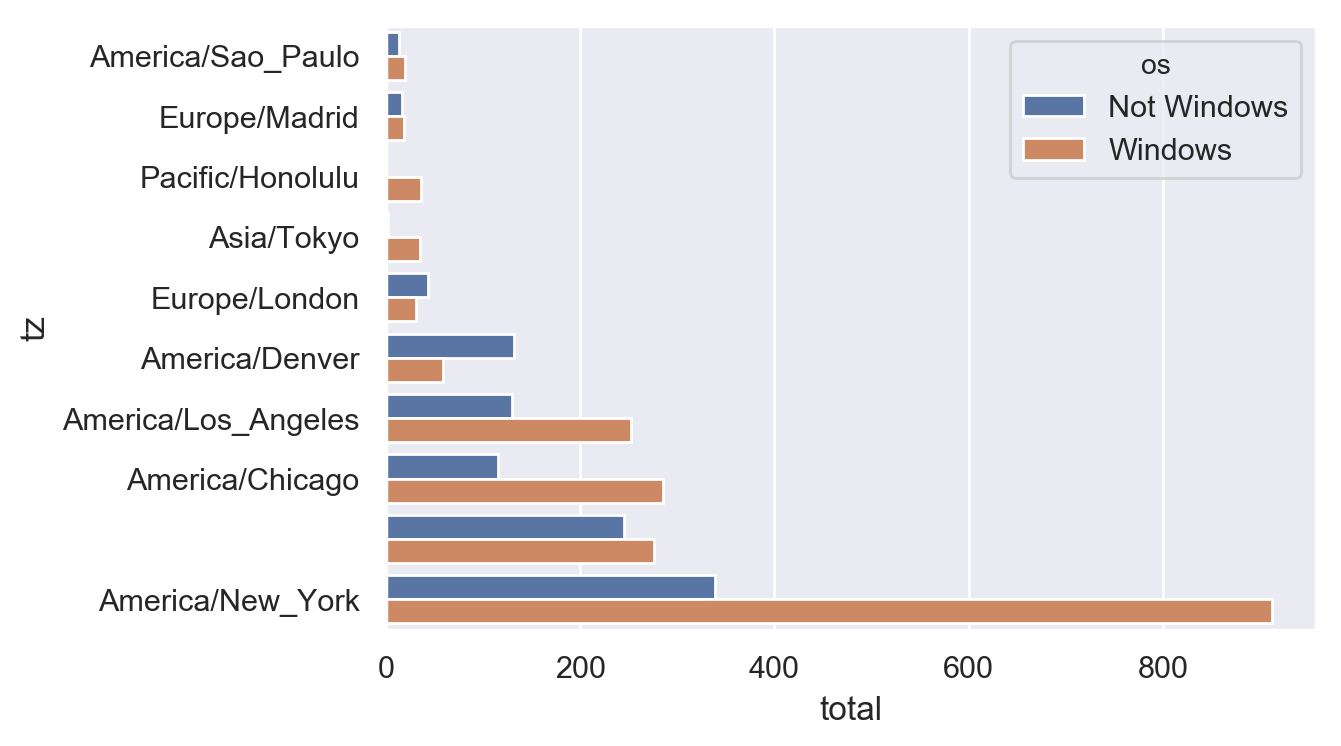

In [232]:
sns.barplot(y='tz', x='total', hue='os', data=count_subset)

根据百分比画图


In [239]:
def norm_total(group):
    group['normal_total'] = group['total'] / group['total'].sum()
    return group
result = count_subset.groupby('tz').apply(norm_total)
result.head(2)

,tz,os,total,normal_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061


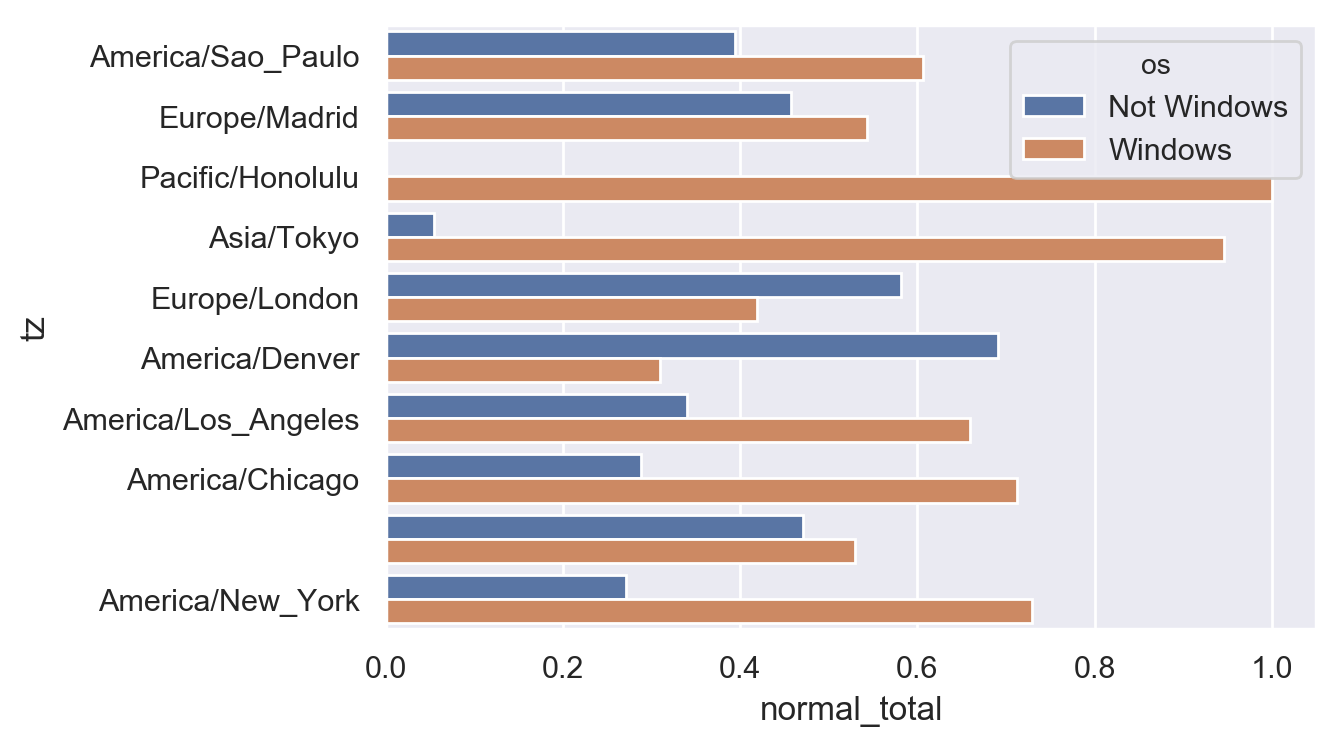

In [246]:
sns.barplot(y='tz', x='normal_total', hue='os', data=result)

## MovieLens 1M数据集

MovieLens 1M数据集含有来自6000名用户对4000部电影的100万条评分数据。它分为三个表：评分、用户信息和电影信息

In [247]:
pd.options.display.max_rows = 10

In [251]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('datasets/movielens/users.dat', sep='::',
                   header=None, names=unames, engine='python')

rname

In [253]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('datasets/movielens/ratings.dat',sep='::',
                     header=None, names=rnames)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [257]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('datasets/movielens/movies.dat', sep='::',
                    header=None,names=mnames, engine='python')

In [259]:
display(users[:3], ratings[:3], movies[:3])

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


示例1：合并三张表，

In [263]:
data = pd.merge(pd.merge(users, ratings), movies)
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


示例2：根据性别计算每部电影的平均得分

In [272]:
mean_ratings = data.pivot_table('rating', index=['title'], columns=['gender'],
                aggfunc='mean')
mean_ratings[:2]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941


该操作产生了另一个DataFrame，其内容为电影平均得分，行标为电影名称（索引），列标为性别。现在，我打算过滤掉评分数据不够250条的电影（随便选的一个数字）。

In [283]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                       37
'Night Mother (1986)                         70
'Til There Was You (1997)                    52
'burbs, The (1989)                          303
...And Justice for All (1979)               199
                                           ... 
Zed & Two Noughts, A (1985)                  29
Zero Effect (1998)                          301
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995)      2
Zeus and Roxanne (1997)                      23
eXistenZ (1999)                             410
Length: 3706, dtype: int64

In [286]:
active_titles = ratings_by_title.index[ratings_by_title>=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

标题索引中含有评分数据大于250条的电影名称，然后我们就可以据此从前面的mean_ratings中选取所需的行了：

In [307]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


为了了解女性观众最喜欢的电影，我们可以对F列降序排列：

In [312]:
top_female_ratings = mean_ratings.sort_values('F', ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


### 计算评分分歧

假设我们想要找出男性和女性观众分歧最大的电影。一个办法是给mean_ratings加上一个用于存放平均得分之差的列，并对其进行排序：

In [314]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [316]:
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


按"diff"排序即可得到分歧最大且女性观众更喜欢的电影：

In [319]:
sorted_by_diff = mean_ratings.sort_values(by='diff', ascending=True)
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


对排序结果反序并取出前10行，得到的则是男性观众更喜欢的电影：

In [320]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


如果只是想要找出分歧最大的电影（不考虑性别因素），则可以计算得分数据的方差或标准差：

In [325]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [328]:
rating_std_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: rating, Length: 1216, dtype: float64

## 1880-2010年全美婴儿姓名

In [331]:
!type datasets\babynames\yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
Annie,F,1258
Clara,F,1226
Ella,F,1156
Florence,F,1063
Cora,F,1045
Martha,F,1040
Laura,F,1012
Nellie,F,995
Grace,F,982
Carrie,F,949
Maude,F,858
Mabel,F,808
Bessie,F,794
Jennie,F,793
Gertrude,F,787
Julia,F,783
Hattie,F,769
Edith,F,768
Mattie,F,704
Rose,F,700
Catherine,F,688
Lillian,F,672
Ada,F,652
Lillie,F,647
Helen,F,636
Jessie,F,635
Louise,F,635
Ethel,F,633
Lula,F,621
Myrtle,F,615
Eva,F,614
Frances,F,605
Lena,F,603
Lucy,F,591
Edna,F,588
Maggie,F,582
Pearl,F,569
Daisy,F,564
Fannie,F,560
Josephine,F,544
Dora,F,524
Rosa,F,507
Katherine,F,502
Agnes,F,473
Marie,F,471
Nora,F,471
May,F,462
Mamie,F,436
Blanche,F,427
Stella,F,414
Ellen,F,411
Nancy,F,411
Effie,F,406
Sallie,F,404
Nettie,F,403
Della,F,391
Lizzie,F,388
Flora,F,365
Susie,F,361
Maud,F,345
Mae,F,344
Etta,F,323
Harriet,F,319
Sadie,F,317
Caroline,F,306
Katie,F,303
Lydia,F,302
Elsie,F,301
Kate,F,299
Susan,

Minnie,M,9
Obie,M,9
Octave,M,9
Orrin,M,9
Ossie,M,9
Oswald,M,9
Park,M,9
Parley,M,9
Ramon,M,9
Rice,M,9
Stonewall,M,9
Theo,M,9
Tillman,M,9
Addie,M,8
Aron,M,8
Ashley,M,8
Bernhard,M,8
Bertie,M,8
Berton,M,8
Buster,M,8
Butler,M,8
Carleton,M,8
Carrie,M,8
Clara,M,8
Clarance,M,8
Clare,M,8
Crawford,M,8
Danial,M,8
Dayton,M,8
Dolphus,M,8
Elder,M,8
Ephriam,M,8
Fayette,M,8
Felipe,M,8
Fernando,M,8
Flem,M,8
Florence,M,8
Ford,M,8
Harlan,M,8
Hayes,M,8
Henery,M,8
Hoy,M,8
Huston,M,8
Ida,M,8
Ivory,M,8
Jonah,M,8
Justin,M,8
Lenard,M,8
Leopold,M,8
Lionel,M,8
Manley,M,8
Marquis,M,8
Marshal,M,8
Mart,M,8
Odie,M,8
Olen,M,8
Oral,M,8
Orley,M,8
Otha,M,8
Press,M,8
Price,M,8
Quincy,M,8
Randall,M,8
Rich,M,8
Richmond,M,8
Romeo,M,8
Russel,M,8
Rutherford,M,8
Shade,M,8
Shelby,M,8
Solon,M,8
Thurman,M,8
Tilden,M,8
Troy,M,8
Woodson,M,8
Worth,M,8
Aden,M,7
Alcide,M,7
Alf,M,7
Algie,M,7
Arlie,M,7
Bart,M,7
Bedford,M,7
Benito,M,7
Billy,M,7
Bird,M,7
Birt,M,7
Bruno,M,7
Burley,M,7
Chancy,M,7
Claus,M,7
Cliff,M,7
Clovis,M,7
Connie,M,7
Cr

In [336]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', 
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5



这些文件中仅含有当年出现超过5次的名字。为了简单起见，我们可以用births列的sex分组小计表示该年度的births总计：

In [339]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

由于该数据集按年度被分隔成了多个文件，所以第一件事情就是要将所有数据都组装到一个DataFrame里面，并加上一个year字段。使用pandas.concat即可达到这个目的

In [340]:
years = range(1880, 2011)

pieces = []
names = ['name', 'sex', 'births']

for year in years:
    # 读取文件
    df = pd.read_csv('datasets/babynames/yob{}.txt'.format(year),
                names=names)
    # 添加年份标识
    df['year'] = year    
    pieces.append(df)

names = pd.concat(pieces, ignore_index=True)

In [342]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


有了这些数据之后，我们就可以利用groupby或pivot_table在year和sex级别上对其进行聚合了，如图14-4所示：

In [349]:
total_births = names.pivot_table('births', index='year', columns='sex',
                 aggfunc=sum)

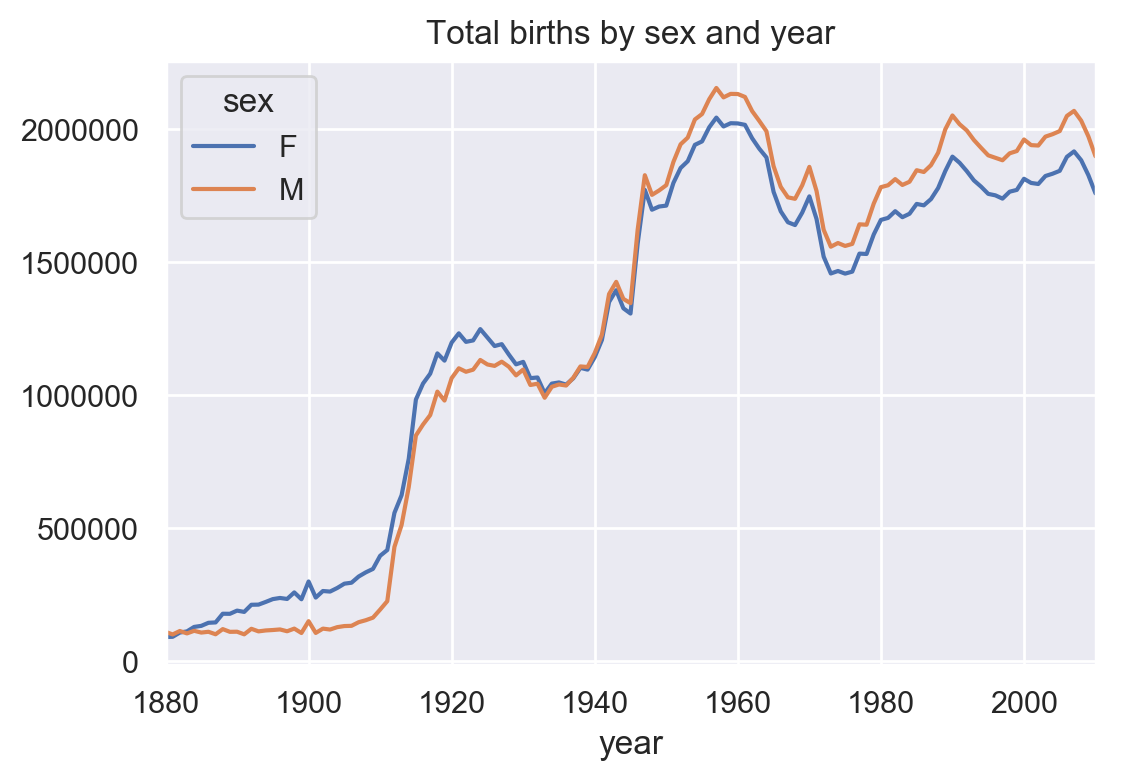

In [350]:
total_births.plot(title='Total births by sex and year')

下面我们来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例。prop值为0.02表示每100名婴儿中有2名取了当前这个名字。因此，我们先按year和sex分组，然后再将新列加到各个分组上：

In [354]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [356]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


在执行这样的分组处理时，一般都应该做一些有效性检查，比如验证所有分组的prop的总和是否为1：

In [358]:
names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

工作完成。为了便于实现更进一步的分析，我需要取出该数据的一个子集：每对sex/year组合的前1000个名字。这又是一个分组操作：

In [363]:
def split(group):
    return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year', 'sex']).apply(split)

In [369]:
top1000.reset_index(inplace=True,drop=True)

In [374]:
# 上面代码与下面等价
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [376]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102



有了完整的数据集和刚才生成的top1000数据集，我们就可以开始分析各种命名趋势了。首先将前1000个名字分为男女两个部分：


In [377]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

这是两个简单的时间序列，只需稍作整理即可绘制出相应的图表（比如每年叫做John和Mary的婴儿数）。我们先生成一张按year和name统计的总出生数透视表：

In [378]:
total_births = top1000.pivot_table('births', index='year',
                                  columns='name',
                                  aggfunc=sum)

In [380]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001672F341F60>,
      dtype=object)

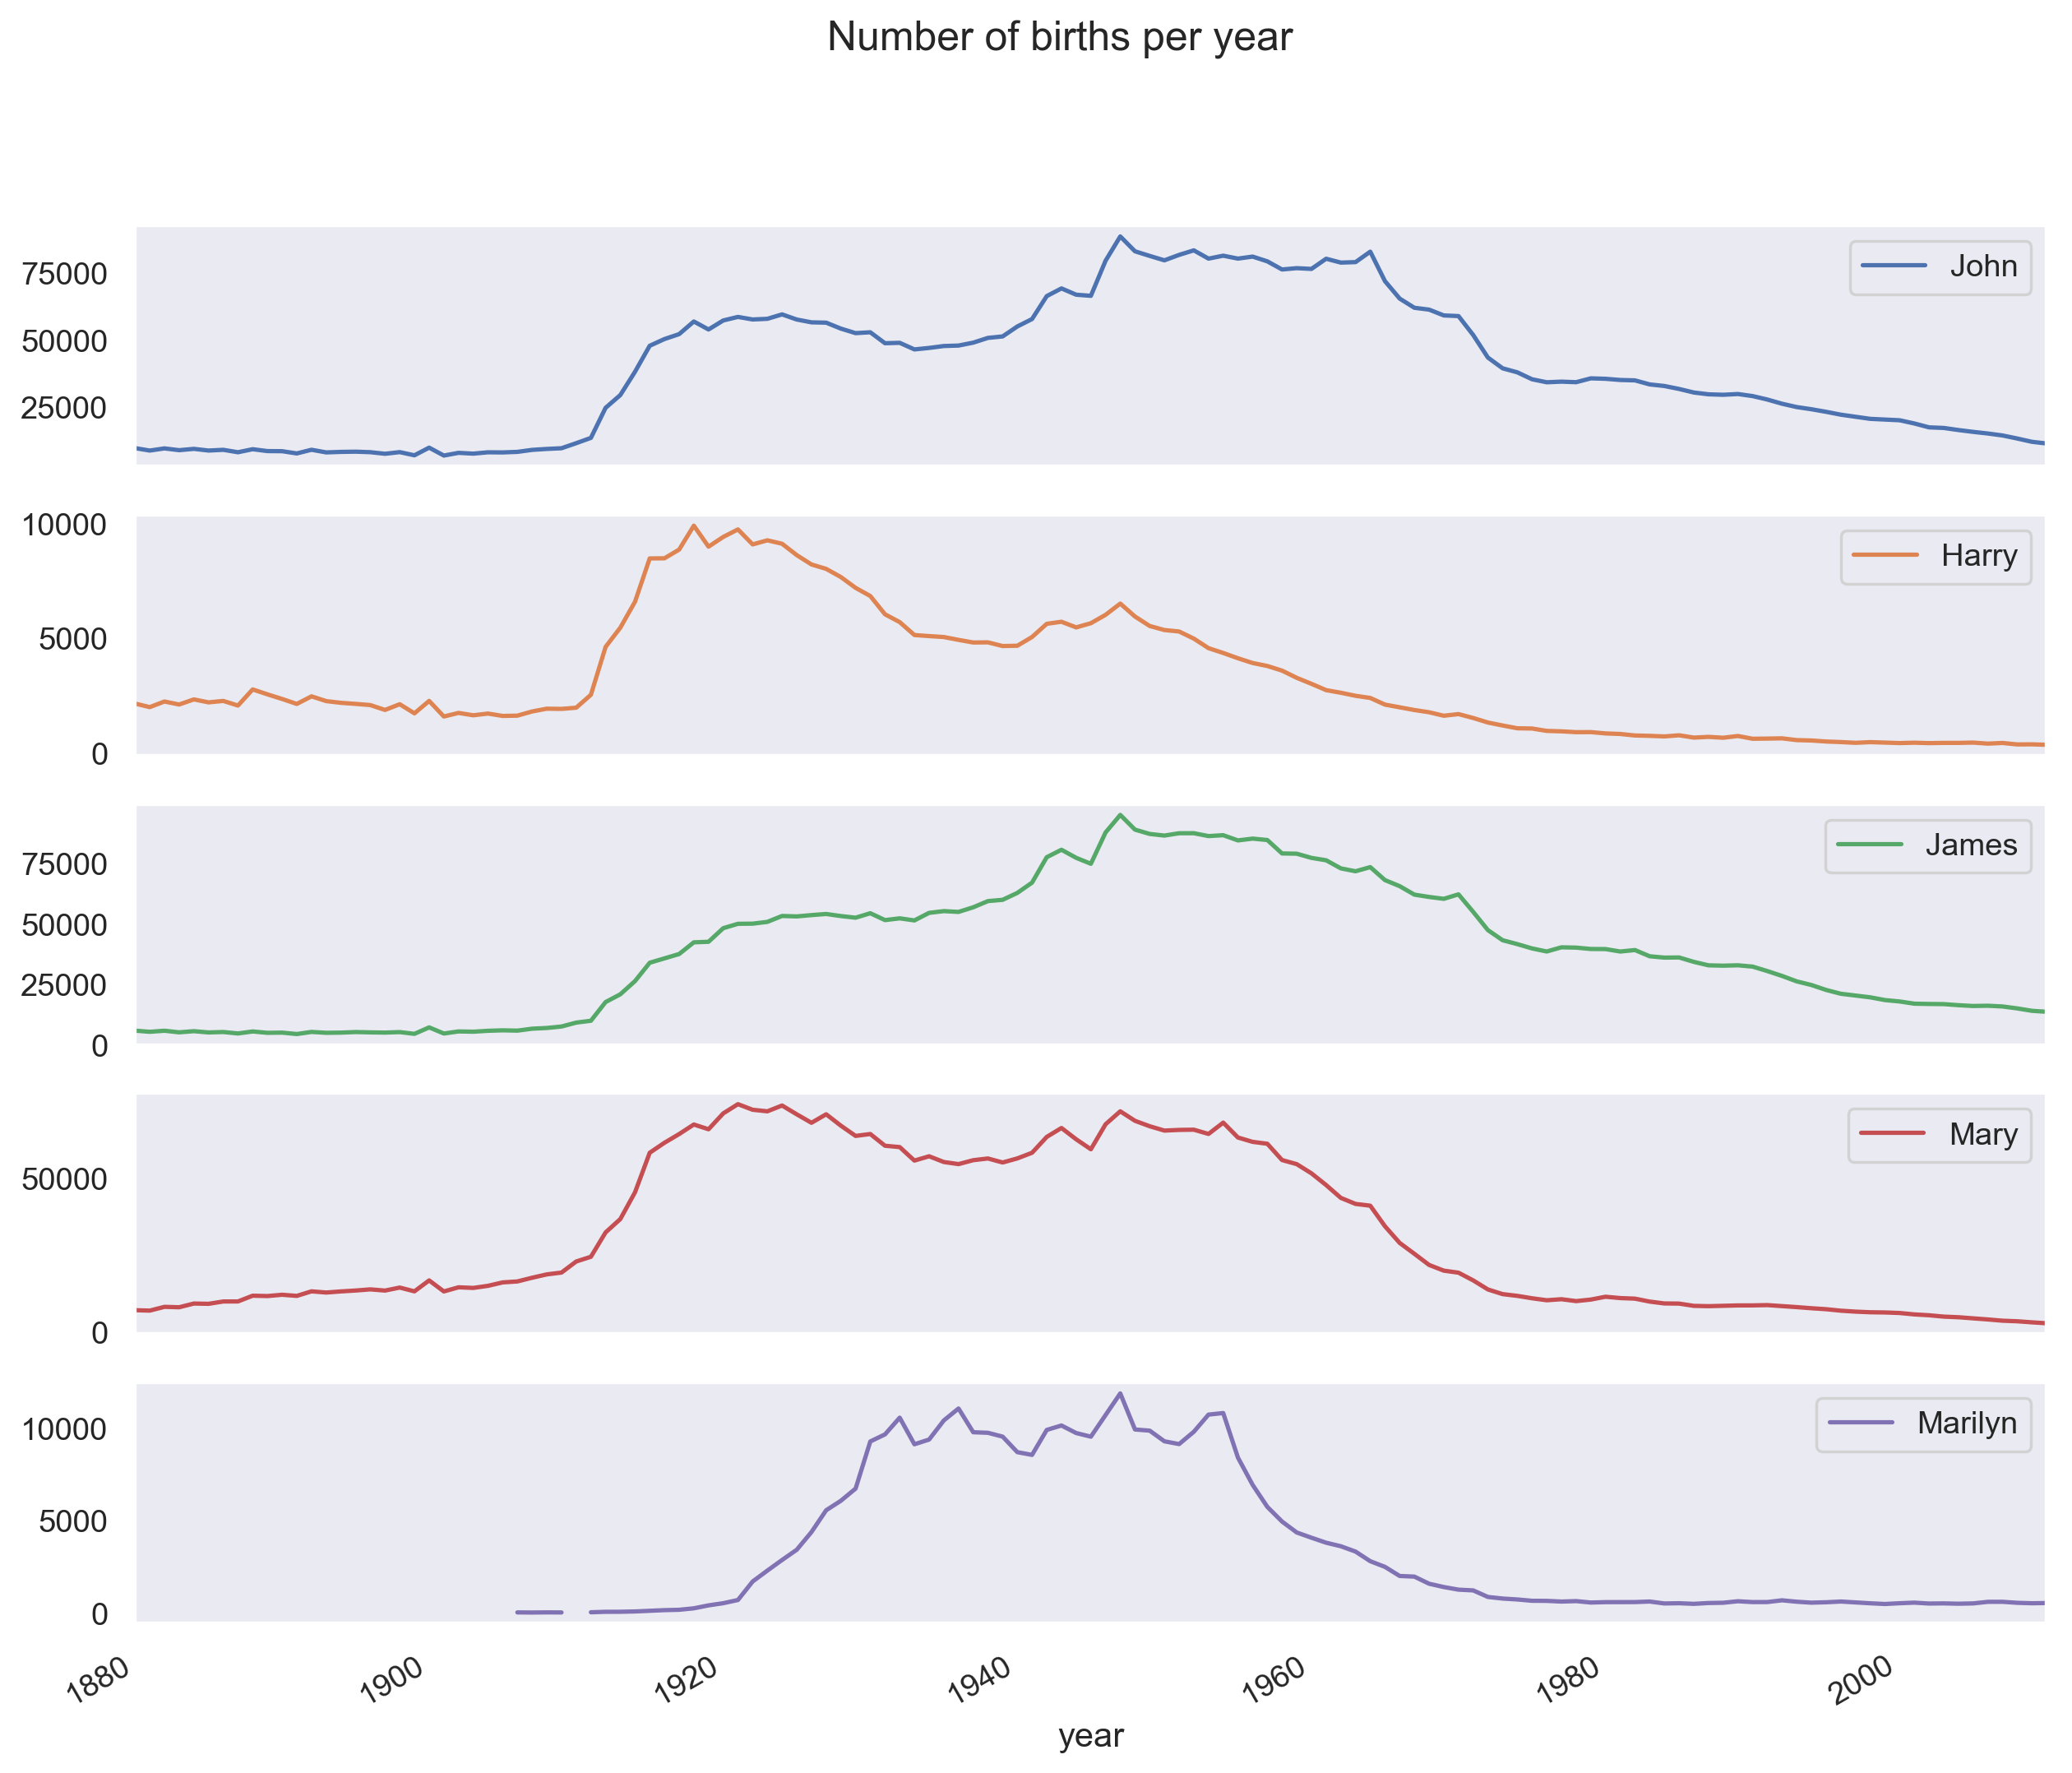

In [389]:
subset = total_births[['John', 'Harry', 'James', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False,
           title='Number of births per year')

### 评估命名多样性的增长

一种解释是父母愿意给小孩起常见的名字越来越少。这个假设可以从数据中得到验证。一个办法是计算最流行的1000个名字所占的比例，我按year和sex进行聚合并绘图

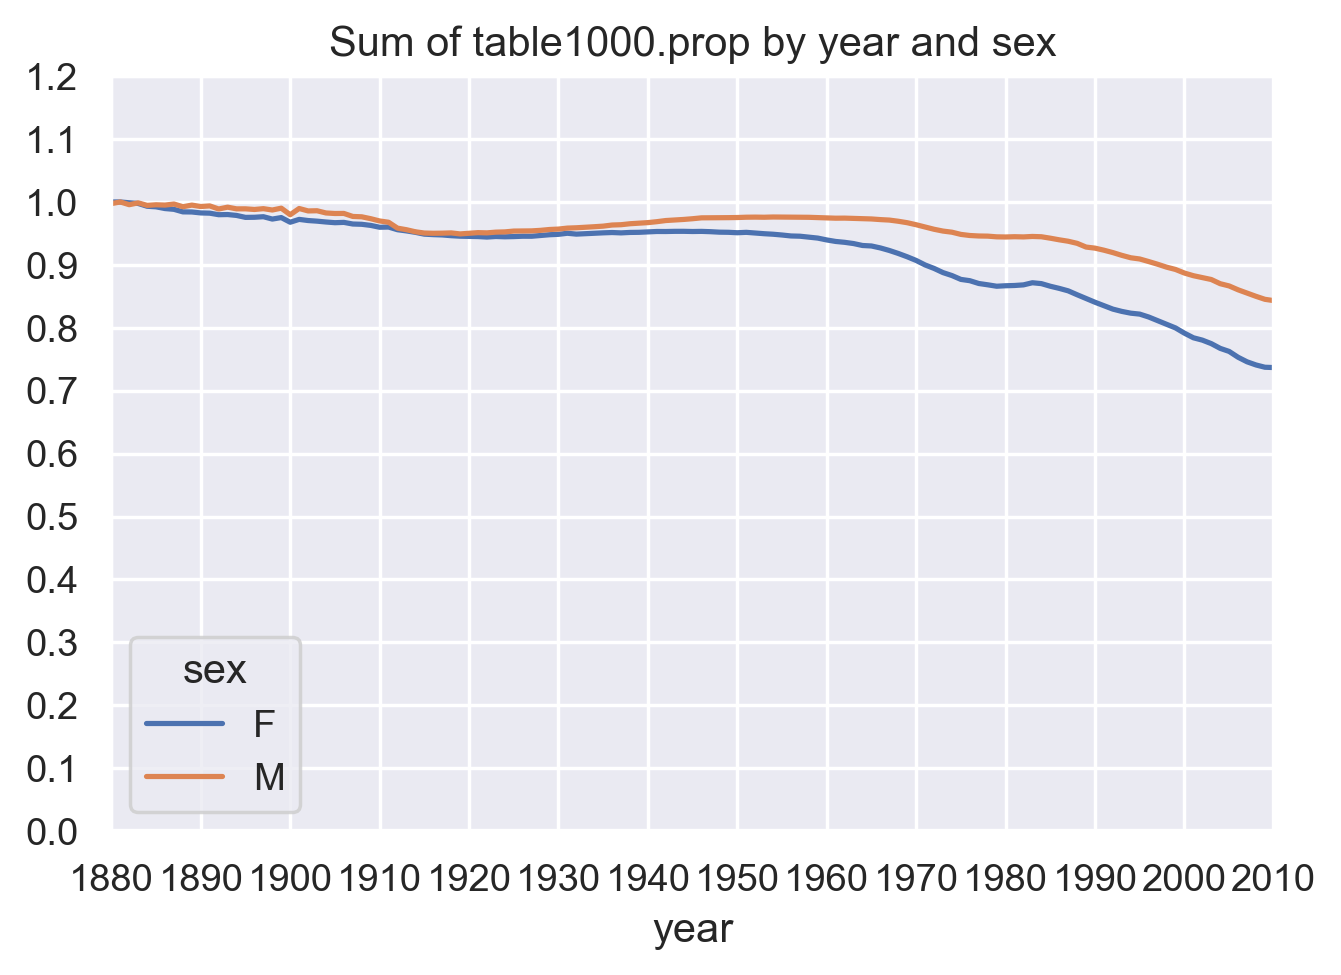

In [390]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))
plt.show()

从图中可以看出，名字的多样性确实出现了增长（前1000项的比例降低）。另一个办法是计算占总出生人数前50%的不同名字的数量，这个数字不太好计算。我们只考虑2010年男孩的名字：

In [391]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102



在对prop降序排列之后，我们想知道前面多少个名字的人数加起来才够50%。虽然编写一个for循环确实也能达到目的，但NumPy有一种更聪明的矢量方式。先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序：

In [395]:
prop_cumsum = df.sort_values(by='births', ascending=False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5) + 1

117

In [397]:
df = boys[boys.year==1900]
in1900 = df.sort_values(by='births', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

现在就可以对所有year/sex组合执行这个计算了。按这两个字段进行groupby处理，然后用一个函数计算各分组的这个值：

In [404]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [410]:
diversity = diversity.unstack('sex')

In [411]:
diversity 

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


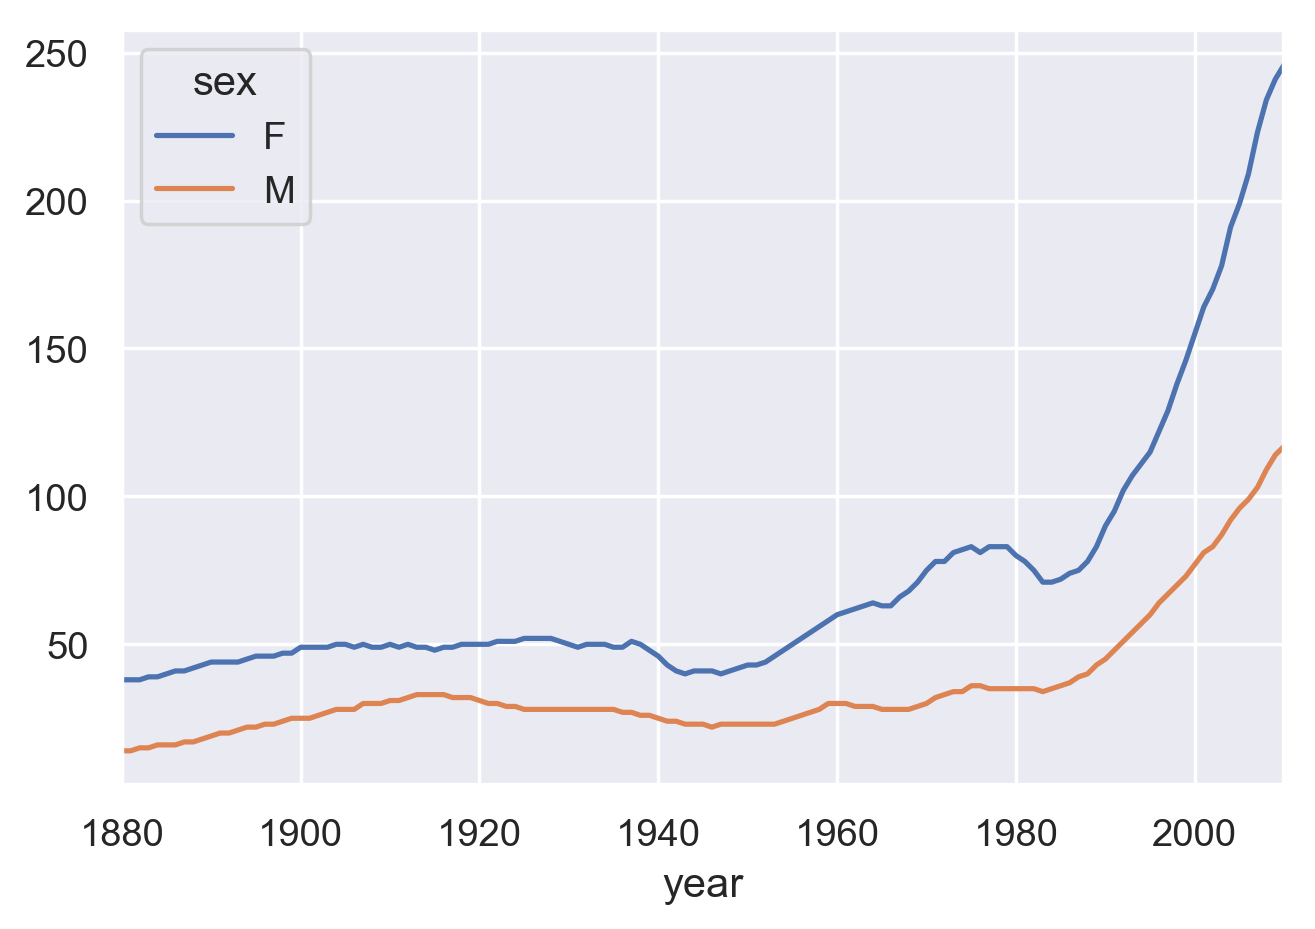

In [413]:
diversity.plot()

### 最后一个字母的变革


In [418]:
get_last_letter = lambda x:x[-1]
names.name.str[-1]

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [420]:
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [424]:
table = names.pivot_table('births', index=last_letters,
                 columns=['sex', 'year'], aggfunc=sum)

In [426]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [428]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [430]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

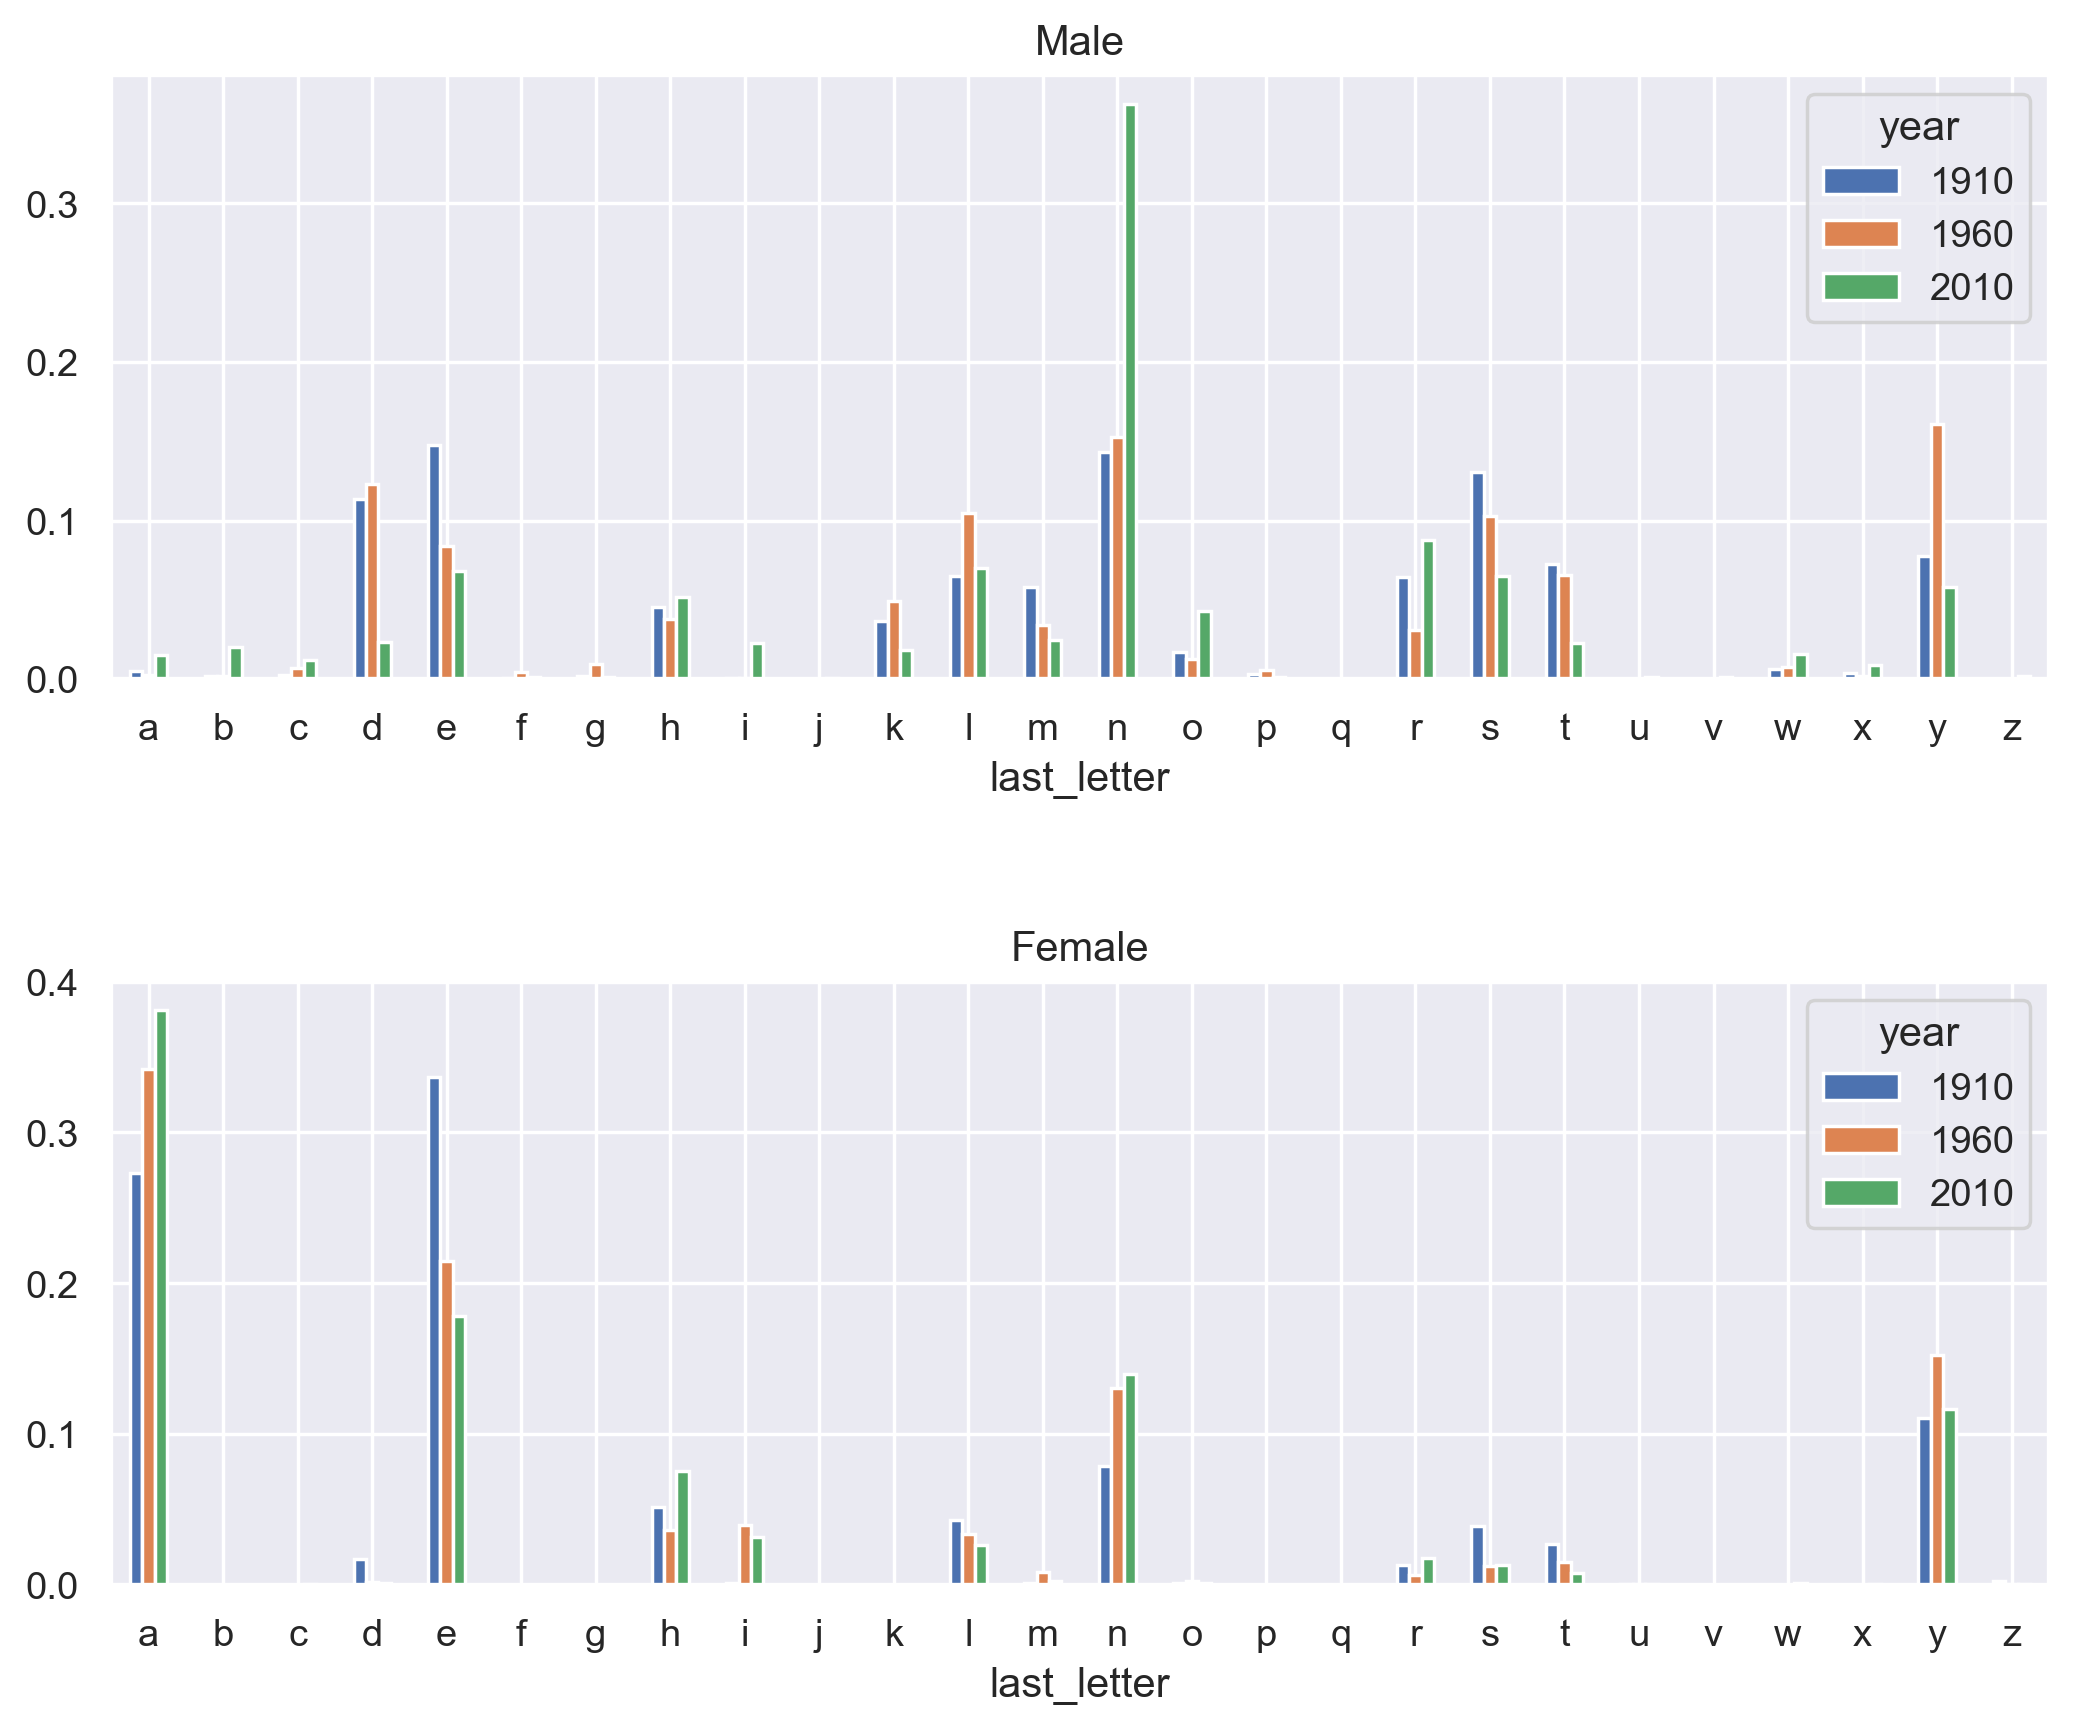

In [434]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
plt.subplots_adjust(hspace=0.5)
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

In [444]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d','n','y'], 'M'].T
dny_ts.head()


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


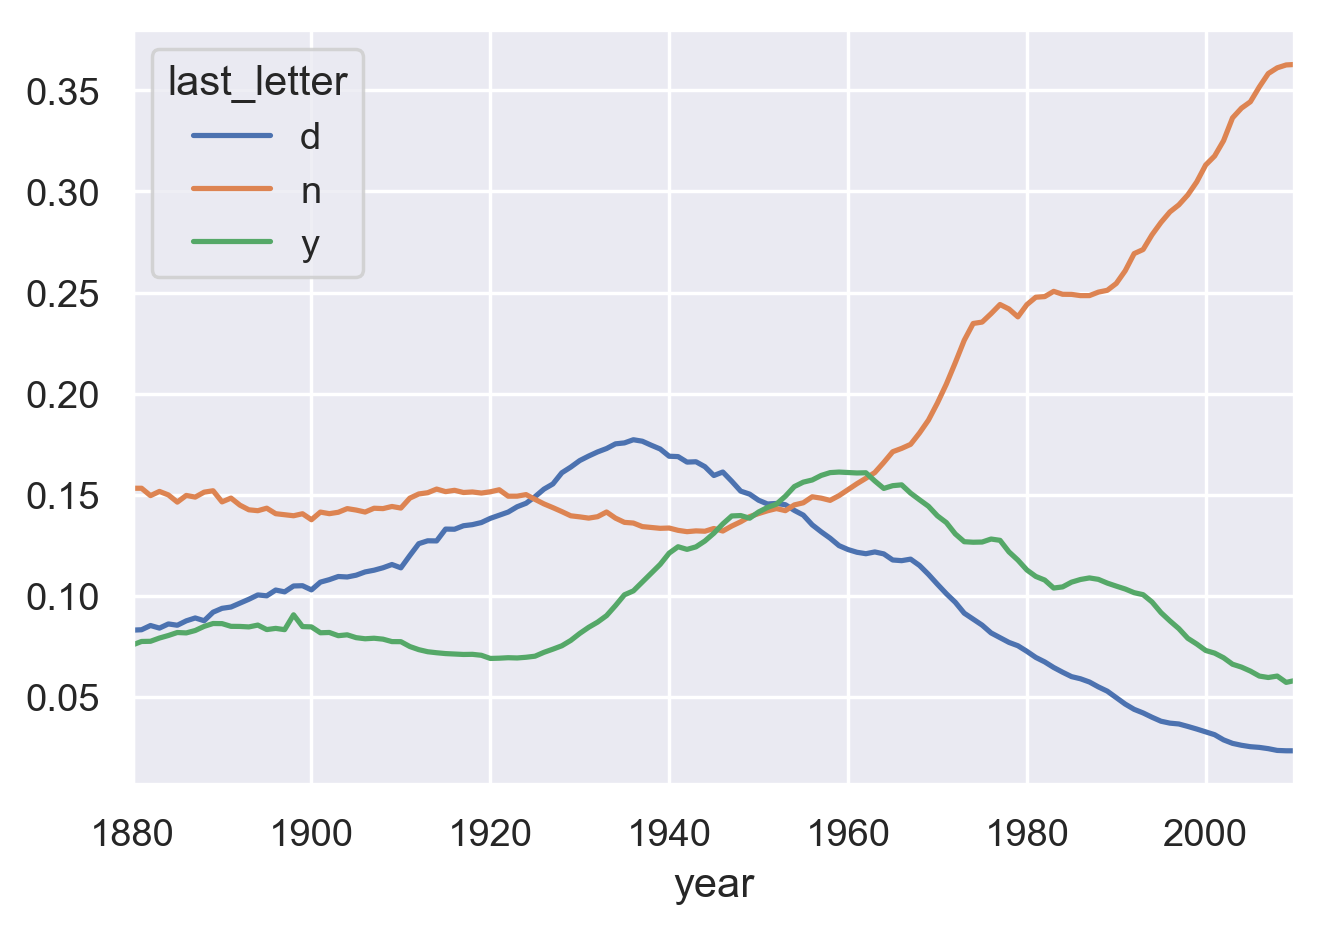

In [446]:
dny_ts.plot()

### 变成女孩名字的男孩名字（以及相反的情况）

另一个有趣的趋势是，早年流行于男孩的名字近年来“变性了”，例如Lesley或Leslie。回到top1000数据集，找出其中以"lesl"开头的一组名字：

In [449]:
all_names = pd.Series(top1000.name.unique())

In [453]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [455]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [456]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [460]:
table = filtered.pivot_table('births', index='year', 
                            columns='sex', aggfunc=sum)
table = table.div(table.sum(1), axis=0)

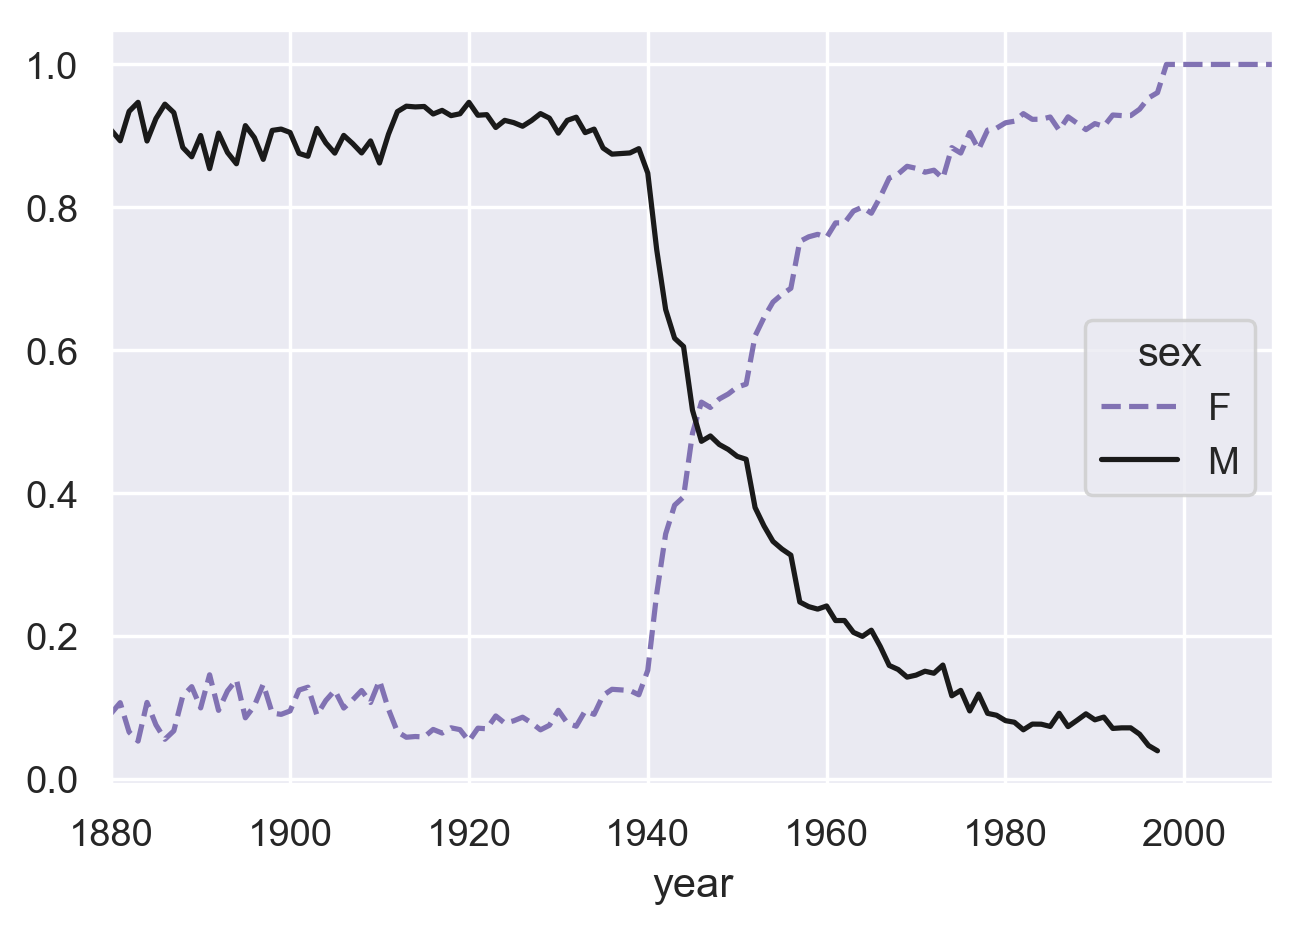

In [462]:
table.plot(style={'M':'k-', 'F':'m--'})

##